In [37]:
import matplotlib.pyplot as plt
import numpy as np
from TemporalNetwork import ContTempNetwork
import benchmark_methods
import networkx as nx
import pickle

In [36]:
selected_lamdas = np.logspace(-5,0,10)

In [69]:
net_heat1 = ContTempNetwork.load('evolving_SBM_net_2activities')

In [70]:
net_heat1.compute_laplacian_matrices(save_adjacencies=True)

In [71]:
window_timelength = 5
considered_times = net_heat1.times[net_heat1.times < net_heat1.times[-1] - window_timelength]

S_asy= []
k_range = range(len(considered_times))
for k in k_range:
    t_rightboundary,k_rightboundary = net_heat1._get_closest_time(net_heat1.times[k] + window_timelength)
    a = net_heat1.compute_static_adjacency_matrix(net_heat1.times[k], net_heat1.times[k_rightboundary])
    G= nx.from_numpy_array(a)
    components = nx.connected_components(G)
    
    S_asy_loc = 0
    for c in components:
        S_asy_loc += len(c) / net_heat1.num_nodes * np.log(len(c))
    S_asy.append(S_asy_loc)

In [72]:
window = 5
Conditional_S_selected5_new = []
for i, lamda in enumerate(selected_lamdas):
    with open(f'//scratch/tmp/180/skoove/evolving_SBM_2activities/window_S_selected_new/{window}/window_S{lamda:.11f}', 'rb') as f:
        S_rate = pickle.load(f)
        Conditional_S_selected5_new.append(S_rate['window_S'][f'{lamda:.11f}'])

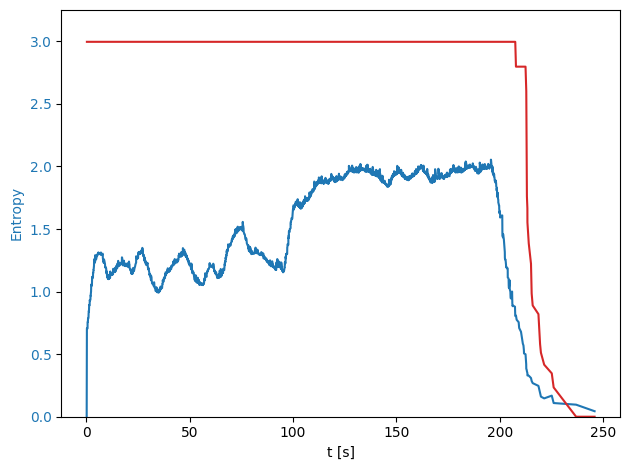

In [82]:
####### Enotrpy Plot
fig, ax = plt.subplots()



index = 6
S = Conditional_S_selected5_new[index]

color = 'tab:blue'
ax.plot(net_heat1.times, S, color=color, alpha=1)
ax.set_xlabel("t [s]")
ax.set_ylabel("Entropy", color=color)
ax.set_ylim(0, 3.25)
ax.tick_params(axis='y', labelcolor=color)

color = 'tab:red'
ax.plot(net_heat1.times[1:], S_asy, color=color)



plt.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.savefig('/home/b/skoove/Desktop/evolving_SBM/evolving_SBM_2activities.png', format='png', dpi=300, bbox_inches='tight')